In [2]:
import requests
import json
import pandas as pd

## API

In [3]:
# URL da API e token de autorização
url = "https://api.api-futebol.com.br/v1/campeonatos/10/tabela"
token = 'x'   #Válido

# Configuração do cabeçalho com o token de autorização
headers = {
    "Authorization": f"Bearer {token}"
}

# Faz a solicitação GET à API
response = requests.get(url, headers=headers)

In [4]:
# Verifica se a solicitação foi bem-sucedida (código de resposta 200)
if response.status_code == 200:
    data = response.json()
else:
    print(f"A solicitação falhou com o código de resposta {response.status_code}")
    data = response.json()

In [5]:
df = pd.DataFrame(data)

In [6]:
a = 0
for index, row in df.iterrows():
    time_info = row['time']
    nome_popular = time_info['nome_popular']
    df['time'][a] = nome_popular
    a = a + 1

C:\Users\dylan\AppData\Local\Temp\ipykernel_4884\1363977395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'][a] = nome_popular


In [7]:
df['id_time'] = ''

In [8]:
b = 0
for a in data:
    df['id_time'].iloc[b] = a['time']['time_id']
    b += 1

C:\Users\dylan\AppData\Local\Temp\ipykernel_4884\2993964221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id_time'].iloc[b] = a['time']['time_id']


## Dados Mínimo para valorizar Cartola

In [10]:
df_cartola = pd.read_excel(r'C:\Users\dylan\Documents\GitHub\Cartola\minimo_para_valorizar.xlsx')

In [11]:
pos = df_cartola.groupby('Pos')[['Pts']].mean().sort_values('Pts', ascending=False).head(5)
time = df_cartola.groupby('Time')[['Pts']].mean().sort_values('Pts', ascending=False).head(5)

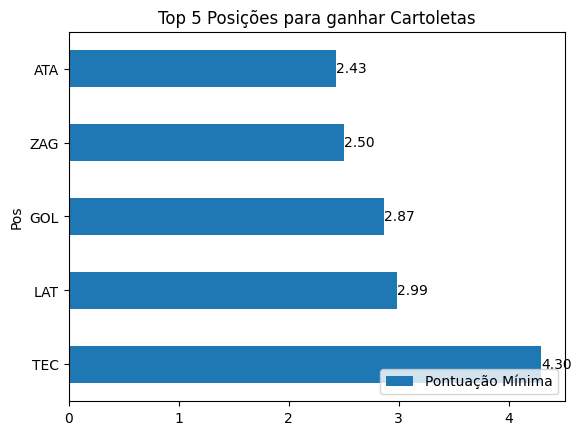

In [12]:
ax = pos.plot(kind='barh',title = 'Top 5 Posições para ganhar Cartoletas',legend = False)
for i, v in enumerate(pos['Pts']):
    ax.text(v, i, f'{v:.2f}', va='center')
ax.legend(['Pontuação Mínima'], loc='lower right')

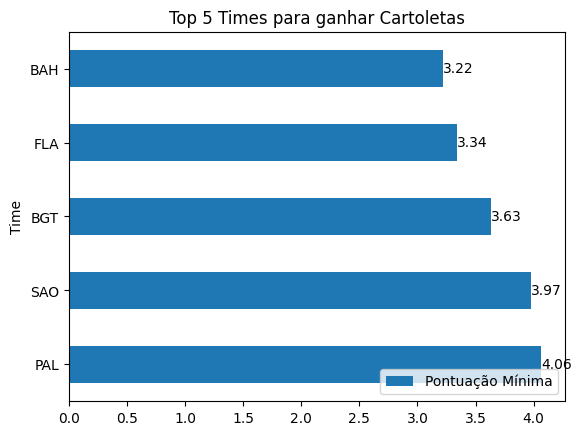

In [13]:
ax = time.plot(kind='barh',title = 'Top 5 Times para ganhar Cartoletas',legend = False)
for i, v in enumerate(time['Pts']):
    ax.text(v, i, f'{v:.2f}', va='center')
ax.legend(['Pontuação Mínima'], loc='lower right')

In [15]:
df

,posicao,pontos,time,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,aproveitamento,variacao_posicao,ultimos_jogos,id_time
0,1,59,Botafogo,28,18,5,5,45,18,27,70,0,"[d, e, v, v, e]",22
1,2,52,Bragantino,29,14,10,5,41,26,15,59,0,"[v, e, v, v, d]",64
2,3,50,Palmeiras,29,14,8,7,47,24,23,57,1,"[d, d, d, v, v]",56
3,4,50,Flamengo,29,14,8,7,43,34,9,57,-1,"[v, e, v, v, d]",18
4,5,48,Athletico-PR,29,13,9,7,44,34,10,55,0,"[d, e, v, e, v]",185
5,6,47,Grêmio,29,14,5,10,46,42,4,54,0,"[e, d, d, d, v]",45
6,7,46,Atlético-MG,29,13,7,9,34,23,11,52,0,"[v, d, v, d, v]",30
7,8,45,Fluminense,29,13,6,10,42,38,4,51,1,"[d, d, e, d, v]",26
8,9,42,Fortaleza,28,12,6,10,33,29,4,50,-1,"[v, e, v, d, d]",131
9,10,38,São Paulo,29,10,8,11,34,34,0,43,0,"[v, e, d, v, d]",57
